In [1]:
import os 
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams.update({
    'axes.titlesize': 14,    # Font size for plot titles
    'axes.labelsize': 12,    # Font size for x and y labels
    'xtick.labelsize': 10,   # Font size for x tick labels
    'ytick.labelsize': 10,   # Font size for y tick labels
    'legend.fontsize': 12,   # Font size for the legend
    'font.size': 12     ,     # Default font size
    'font.family': 'serif',
})

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import os

def save_training_curves(best_epoch_nums, foldwise_histories, out_path, titlename,modelname, foldwise_best_epoch_metrics=None, cross_val_metrics=None):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    colors = ['b', 'g', 'r']
    
    for i, (fold, history) in enumerate(foldwise_histories.items()):
        axs[0].plot(history['train_loss_history'], label=f"Fold {i+1} Train", color=colors[i])
        axs[0].plot(history['val_loss_history'], label=f"Fold {i+1} Validation", linestyle='--', color=colors[i])
        axs[0].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f"Fold {i+1} Best Epoch")

        axs[1].plot(history['train_iou_history'], label=f"Fold {i+1} Train", color=colors[i])
        axs[1].plot(history['val_iou_history'], label=f"Fold {i+1} Validation", linestyle='--', color=colors[i])
        axs[1].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f"Fold {i+1} Best Epoch")

        axs[2].plot(history['train_f1_history'], label=f"Fold {i+1} Train", color=colors[i])
        axs[2].plot(history['val_f1_history'], label=f"Fold {i+1} Validation", linestyle='--', color=colors[i])
        axs[2].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f"Fold {i+1} Best Epoch")
    
    axs[0].set_title('Dice Loss', fontsize=15)
    axs[0].set_xlabel('Epoch', fontsize=12)
    axs[0].set_ylabel('Loss', fontsize=12)
    
    axs[1].set_title('IoU', fontsize=15)
    axs[1].set_xlabel('Epoch', fontsize=12)
    axs[1].set_ylabel('IoU', fontsize=12)
    
    axs[2].set_title('F1 Score', fontsize=15)
    axs[2].set_xlabel('Epoch', fontsize=12)
    axs[2].set_ylabel('F1 Score', fontsize=12)

    # Combine all unique handles and labels from all subplots
    handles, labels = [], []
    for ax in axs:
        for handle, label in zip(*ax.get_legend_handles_labels()):
            if label not in labels:
                handles.append(handle)
                labels.append(label)

    # Create a single legend for all subplots
    fig.legend(handles, labels, loc='center right', fontsize='small')

    # Increase fontsize for ticks
    for ax in axs.flatten():
        ax.tick_params(axis='both', which='major', labelsize=12)

    # Set x-ticks
    max_x_ticks = max([len(history['train_loss_history']) for history in foldwise_histories.values()])
    for ax in axs.flatten():
        ax.set_xticks(np.arange(0, max_x_ticks, step=10))

    # set super title
    plt.suptitle(titlename, fontsize=14)
    plt.tight_layout(rect=[0, 0, 0.87, 1])  # Adjust layout to make space for the legend
    plt.savefig(os.path.join(out_path, f'curves_v2{modelname}.png'), dpi=800, pad_inches=0.2, bbox_inches='tight')
    plt.savefig(os.path.join(r'E:\Thesis\outputs\00_charts\plots\curves', f'curves_v2{modelname}.png'), dpi=800, pad_inches=0.2, bbox_inches='tight')
    plt.show()
    plt.close()

# Example usage:
# save_training_curves(best_epoch_nums, foldwise_histories, 'output_path')


In [ ]:

def save_training_curves_ssl(best_epoch_nums, fold_histories, fold_metrics, cross_val_metrics, out_path):   
    # save each history list
    dir_hist = os.path.join(out_path, 'fold_histories_ssl')
    os.makedirs(dir_hist, exist_ok=True)
    for key, history in fold_histories.items():
        np.save(os.path.join(dir_hist, f'{key}_history.npy'), history)

    # check dual or single ssl: if sum of t1 accuracy history or t2 accuracy history is zero, then 1 by 2 plot, else 2 by 3 plot. check with in one fold
    if np.sum(fold_histories['fold_0']['train_acc_history_t1']) == 0 or np.sum(fold_histories['fold_0']['train_acc_history_t2']) == 0:
        fig, axs = plt.subplots(1,2, figsize=(12, 5))
        colors = ['b', 'g', 'r']

        for i, (fold, history) in enumerate(fold_histories.items()):
            axs[0].plot(history['train_loss_history'], label=f'Fold {i+1} Train', color=colors[i])
            axs[0].plot(history['val_loss_history'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[0].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')
            axs[1].plot(history['train_acc_history'], label=f'Fold {i+1} Train', color=colors[i])
            axs[1].plot(history['val_acc_history'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[1].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

        axs[0].set_title('Loss', fontsize=15)
        axs[0].set_xlabel('Epochs', fontsize=12)
        axs[0].set_ylabel('Loss', fontsize=12)
        axs[0].legend()

        axs[1].set_title('Accuracy Metric', fontsize=15)
        axs[1].set_xlabel('Epochs', fontsize=12)
        axs[1].set_ylabel('Accuracy', fontsize=12)
        axs[1].legend()

        #fontsize ticks increase
        for ax in axs:
            ax.tick_params(axis='both', which='major', labelsize=12)
        
        max_x_ticks = max([len(history['train_loss_history']) for history in fold_histories.values()])  
        axs[0].set_xticks(np.arange(0, max_x_ticks, step = 5))
        axs[1].set_xticks(np.arange(0, max_x_ticks, step = 5))

        plt.tight_layout()
        plt.savefig(os.path.join(out_path, 'training_curves_ssl.png'), dpi=800, pad_inches=0.2, bbox_inches='tight')
        plt.close()

    
    else:
        fig, axs = plt.subplots(3,2, figsize=(12, 15))
        colors = ['b', 'g', 'r']

        for i, (fold, history) in enumerate(fold_histories.items()):
            axs[0,0].plot(history['train_loss_history'], label=f'Fold {i+1} Train', color=colors[i])
            axs[0,0].plot(history['val_loss_history'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[0,0].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')
            axs[0,1].plot(history['train_acc_history'], label=f'Fold {i+1} Train', color=colors[i])
            axs[0,1].plot(history['val_acc_history'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[0,1].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

            axs[1,0].plot(history['train_loss_history_t1'], label=f'Fold {i+1} Train', color=colors[i])
            axs[1,0].plot(history['val_loss_history_t1'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[1,0].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')
            axs[1,1].plot(history['train_acc_history_t1'], label=f'Fold {i+1} Train', color=colors[i])
            axs[1,1].plot(history['val_acc_history_t1'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[1,1].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

            axs[2,0].plot(history['train_loss_history_t2'], label=f'Fold {i+1} Train', color=colors[i])
            axs[2,0].plot(history['val_loss_history_t2'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[2,0].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')
            axs[2,1].plot(history['train_acc_history_t2'], label=f'Fold {i+1} Train', color=colors[i])
            axs[2,1].plot(history['val_acc_history_t2'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[2,1].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

        axs[0,0].set_title('Combined Loss', fontsize=15)
        axs[0,1].set_title('Combined Accuracy Metric', fontsize=15)
        axs[1,0].set_title('Loss T1', fontsize=15)
        axs[1,1].set_title('Accuracy Metric T1', fontsize=15)
        axs[2,0].set_title('Loss T2', fontsize=15)
        axs[2,1].set_title('Accuracy Metric T2', fontsize=15)

        max_x_ticks = max([len(history['train_loss_history']) for history in fold_histories.values()])
        for ax in axs.flatten():
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.set_xlabel('Epochs', fontsize=12)
            ax.set_ylabel('Loss', fontsize=12)
            ax.legend()
            ax.set_xticks(np.arange(0, max_x_ticks, step = 5))

        plt.tight_layout()
        plt.savefig(os.path.join(out_path, 'training_curves_ssl.png'), dpi=800, pad_inches=0.2, bbox_inches='tight')
        plt.close()

        #--------------------------Plot weights and logvariance

        fig, axs = plt.subplots(1,2, figsize=(12, 5))
        colors = ['b', 'g', 'r']
        for i, (fold, history) in enumerate(fold_histories.items()):
            axs[0].plot(history['log_var_seg_history'], label=f'Fold {i+1} Segmentation', color=colors[i])
            axs[0].plot(history['log_var_rec_history'], label=f'Fold {i+1} Reconstruction', color=colors[i], linestyle='--')
            axs[0].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

            weights_seg = [1/np.exp(log_var) for log_var in history['log_var_seg_history']] 
            weights_rec = [1/(2*np.exp(log_var)) for log_var in history['log_var_rec_history']]
            axs[1].plot(weights_seg, label=f'Fold {i+1} Segmentation', color=colors[i])
            axs[1].plot(weights_rec, label=f'Fold {i+1} Reconstruction', color=colors[i], linestyle='--')
            axs[1].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

        # set title, labels and ticks., ticks params
        for ax in axs:
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.set_xticks(np.arange(0, max_x_ticks, step = 5))
            ax.set_xlabel('Epochs', fontsize=12)
            ax.legend()

        axs[0].set_title('Log Variance', fontsize=15)
        axs[0].set_ylabel('Log Variance', fontsize=12  )

        axs[1].set_title('Weights', fontsize=15)
        axs[1].set_ylabel('Weight', fontsize=12)

        plt.tight_layout()
        plt.savefig(os.path.join(out_path, 'weights_log_variance_ssl.png'), dpi=800, pad_inches=0.2, bbox_inches='tight')
        plt.close()

    #save fold_metrics in csv
    index = list(fold_metrics['fold_0'].keys())
    metrics = pd.DataFrame(fold_metrics, index=index)
    metrics.to_csv(os.path.join(out_path, 'train_fold_metrics_ssl.csv'), index=True, index_label='metric', float_format='%.4f')

    #save cross_val_metrics in csv
    metrics = pd.DataFrame(cross_val_metrics, index=[0])
    metrics.to_csv(os.path.join(out_path, 'train_cross_val_metrics_ssl.csv'), index=False, float_format='%.4f')


In [32]:
path = r'E:\Thesis\outputs\01_finalised_models'
modelbasenames = [
    '44946_20240524_s2_scratch',
    '45091_20240529_siam_18_scratch',
    '44948_20240524_siam_33_scratch',
    '44949_20240524_siam_48_scratch',
    '44975_20240525_siam_96_scratch',
    '44993_20240526_s2_siam_96_scratch',

    '44961_20240524_single_recon_fe',
    '44996_20240527_single_segsiam_fe',
    '45142_20240530_dual_fe',

    '45489_20240607_single_recon_ft',
    '45000_20240527_single_segsiam_ft',
    '45452_20240606_dual_ft'
]

In [63]:
plotnames = [  'Training curves for multispectral input - trained from scratch',
                'Training curves for SIAM-18 - trained from scratch',
                'Training curves for SIAM-33 - trained from scratch',
                'Training curves for SIAM-48 - trained from scratch',
                'Training curves for SIAM-96 - trained from scratch',
                'Training curves for combined input - trained from scratch',

                'Training curves for downstream of reconstruction - frozen encoder',
                'Training curves for downstream of SIAM segmentation - frozen encoder',
                'Training curves for downstream of dual-task- frozen encoder',

                'Training curves for downstream of reconstruction - fully fine-tuned',
                'Training curves for downstream of SIAM segmentation - fully fine-tuned',
                'Training curves for downstream of dual-task - fully fine-tuned'
]


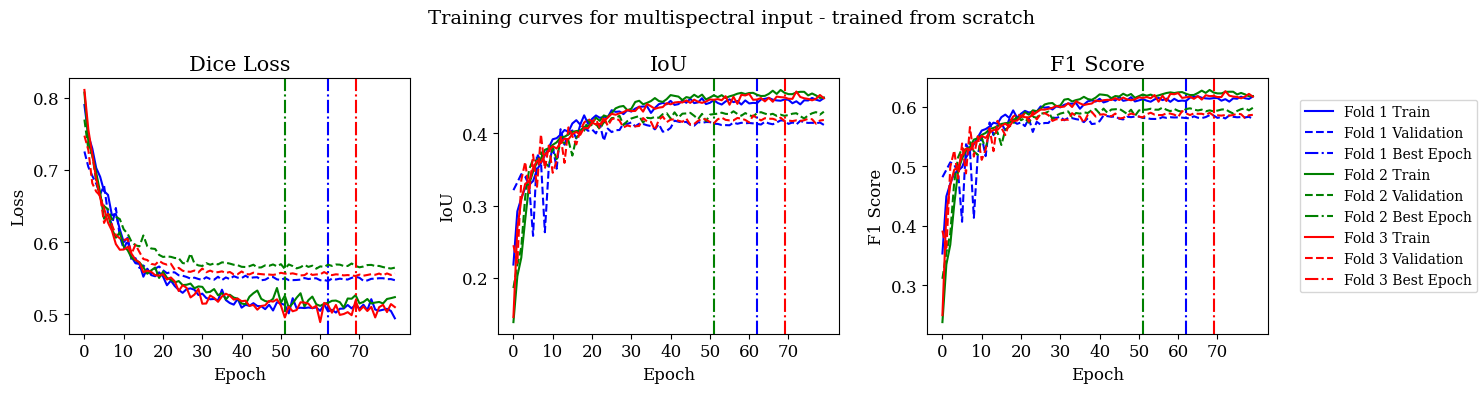

44946_20240524_s2_scratch done


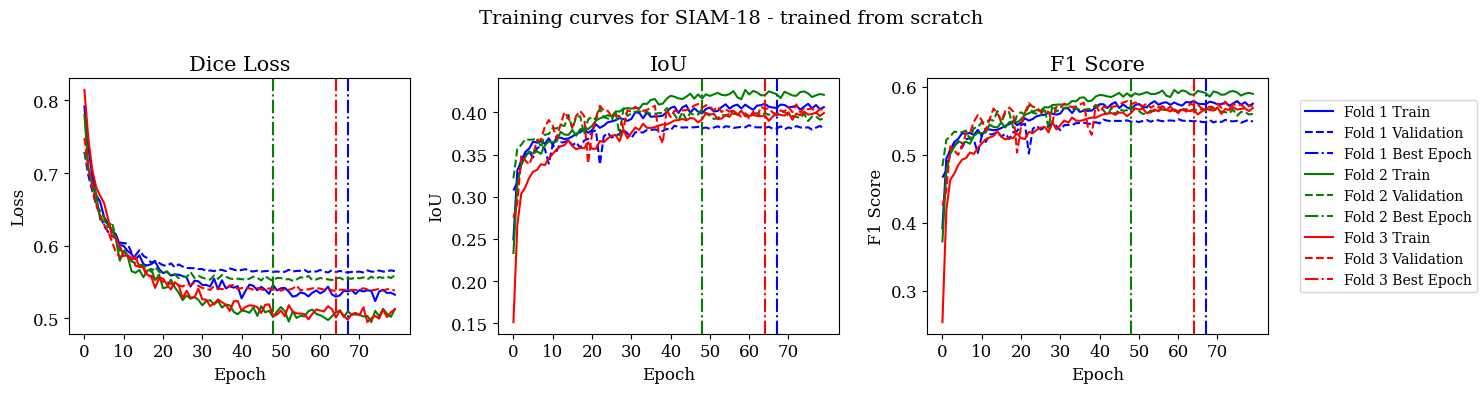

45091_20240529_siam_18_scratch done


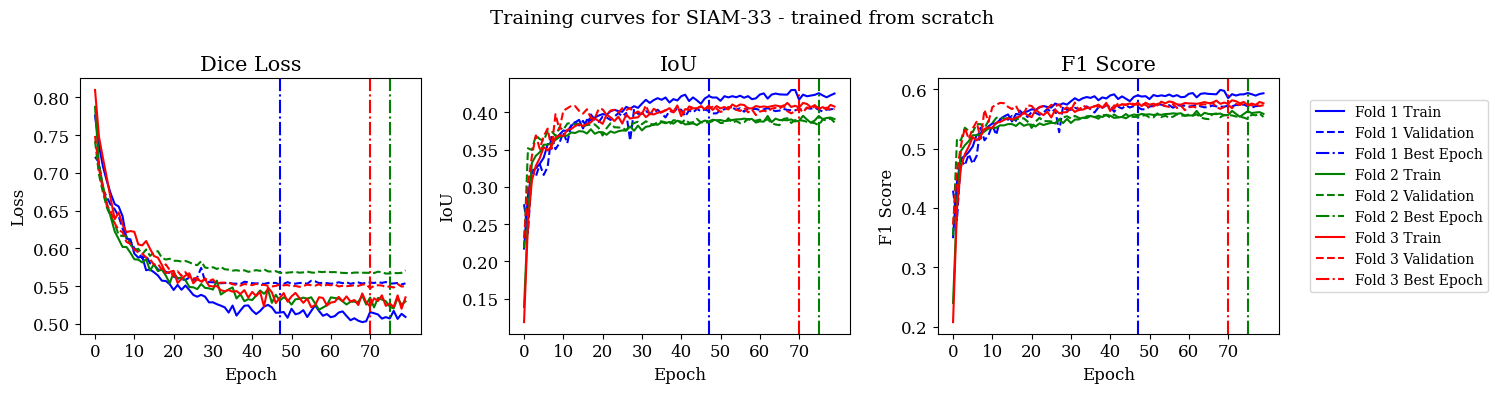

44948_20240524_siam_33_scratch done


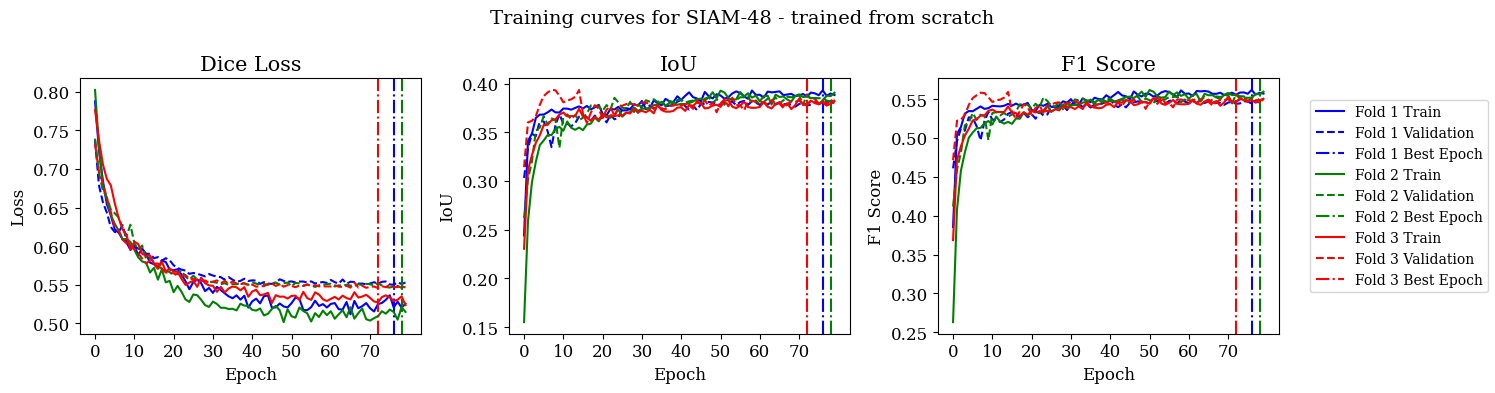

44949_20240524_siam_48_scratch done


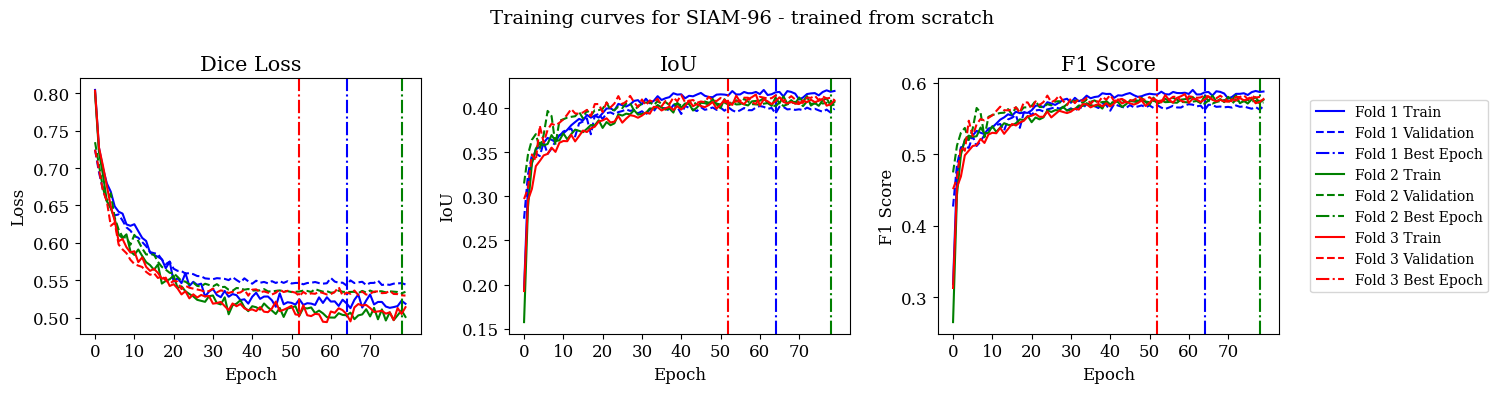

44975_20240525_siam_96_scratch done


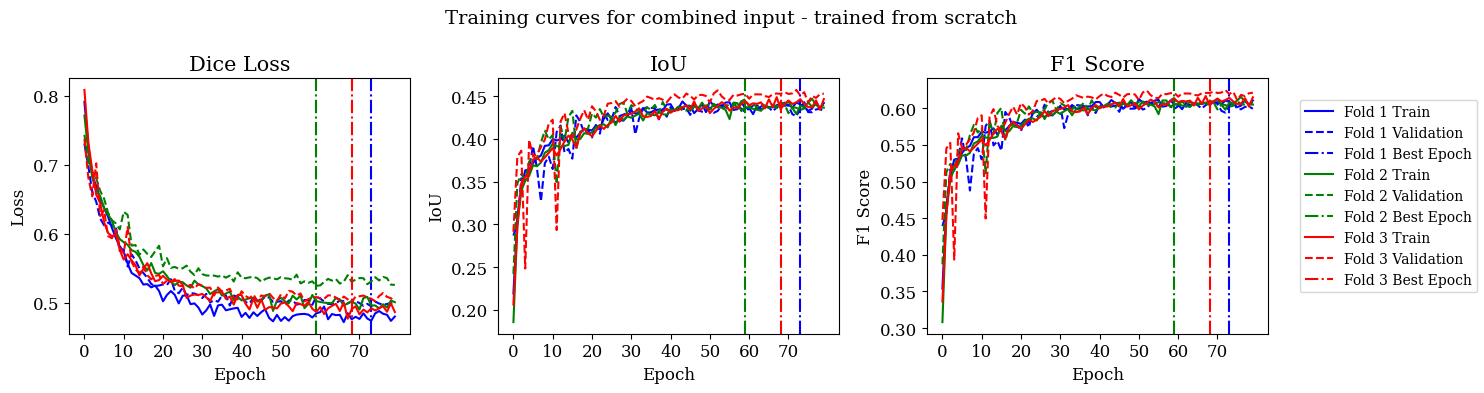

44993_20240526_s2_siam_96_scratch done


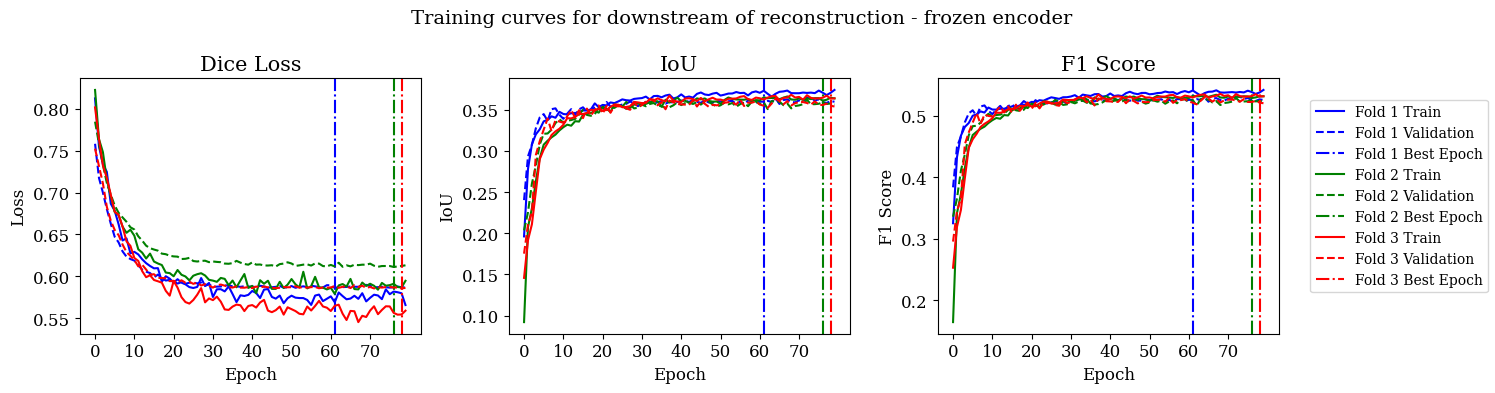

44961_20240524_single_recon_fe done


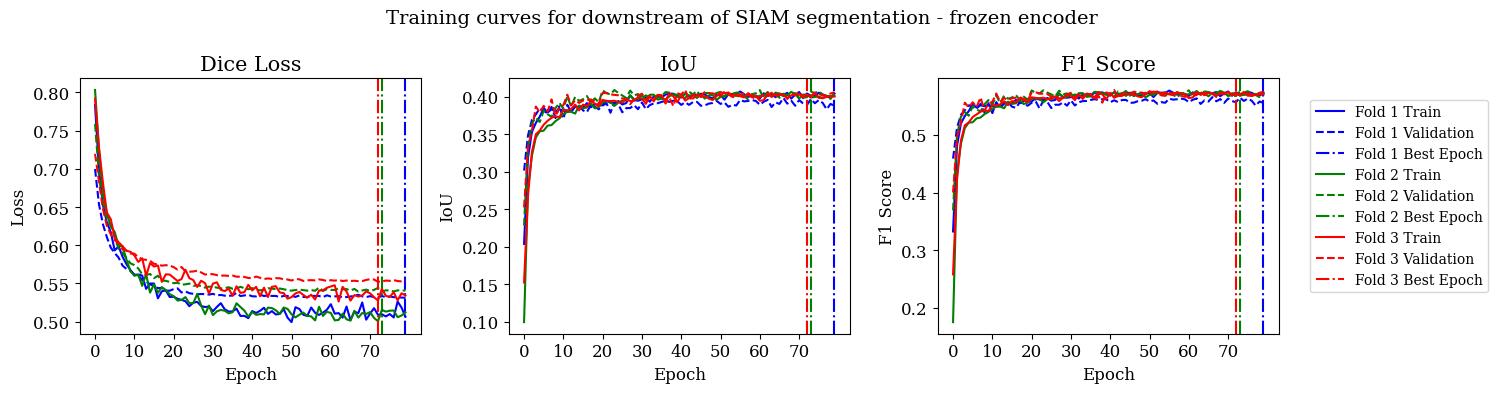

44996_20240527_single_segsiam_fe done


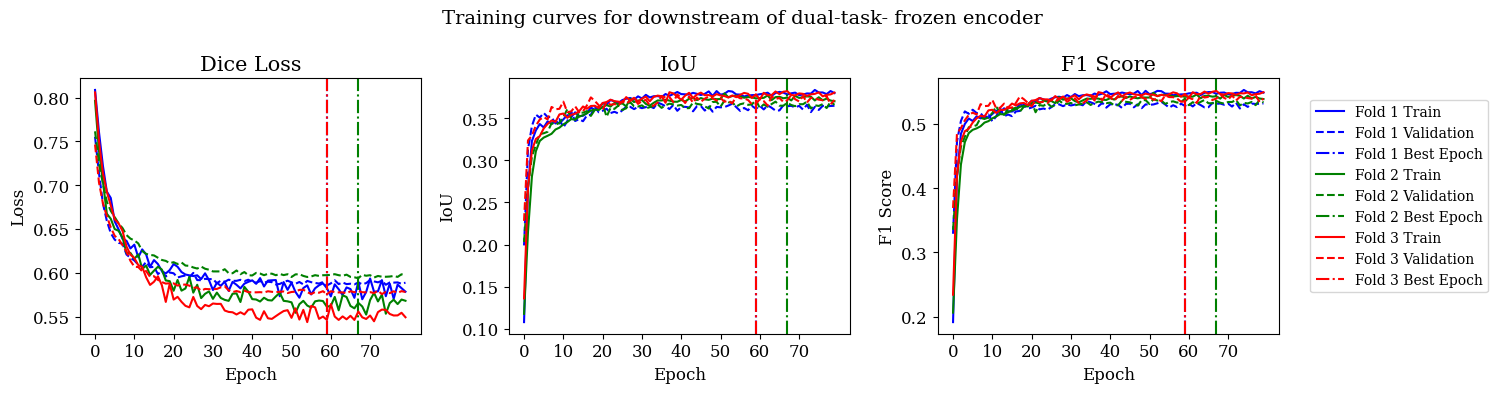

45142_20240530_dual_fe done


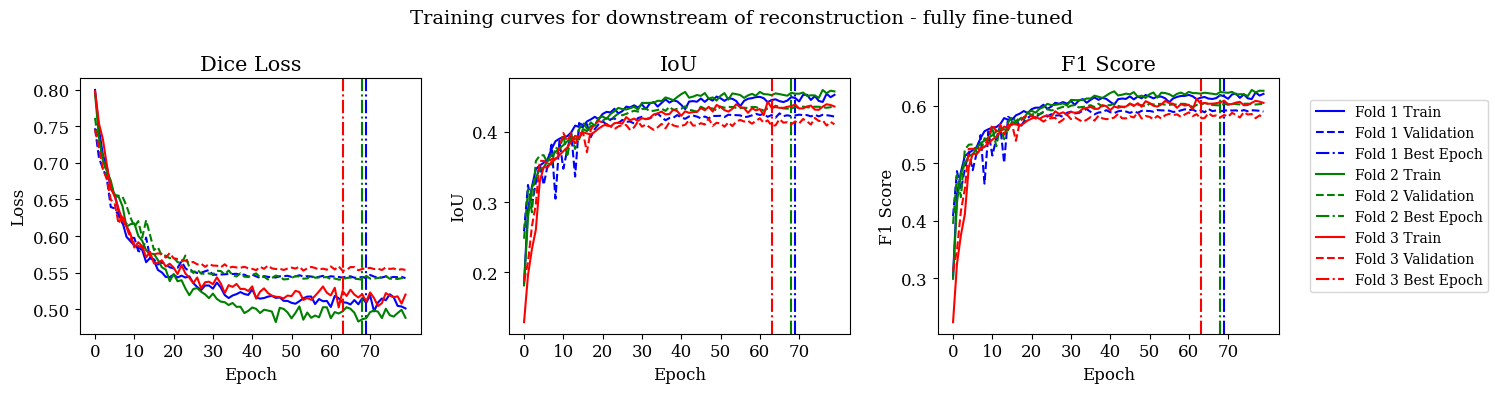

45489_20240607_single_recon_ft done


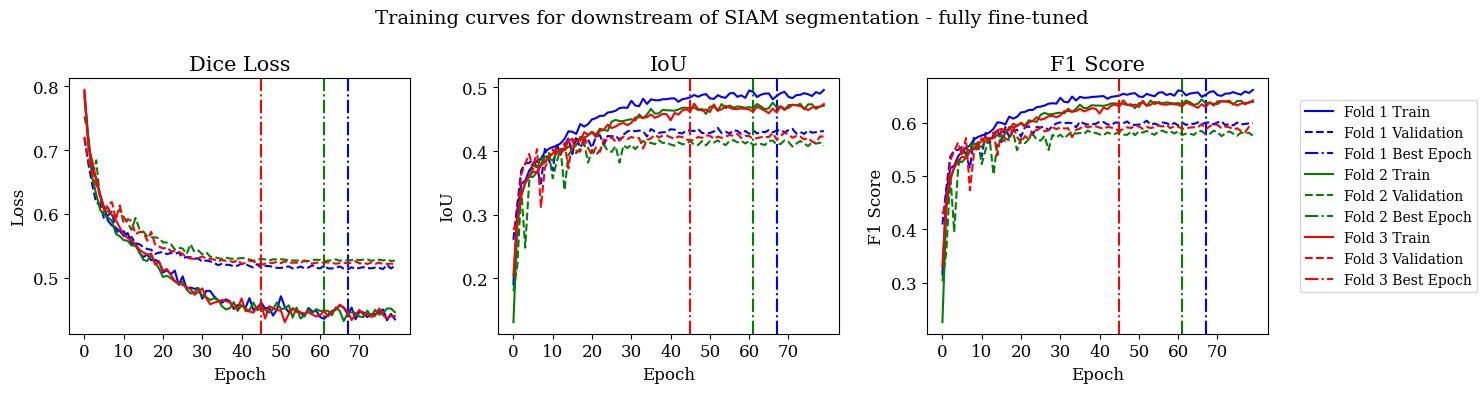

45000_20240527_single_segsiam_ft done


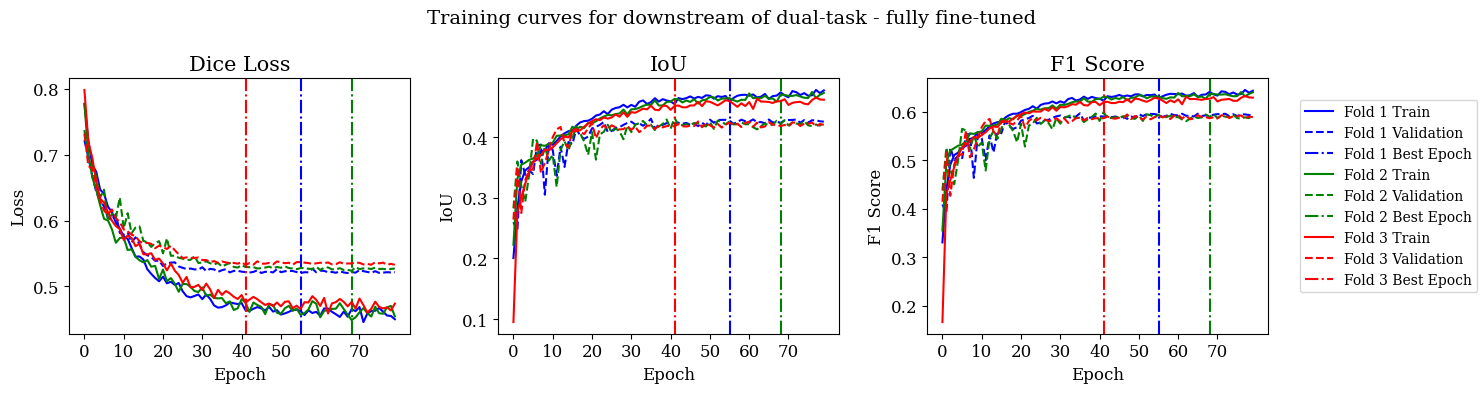

45452_20240606_dual_ft done


In [65]:
for k,i in enumerate(modelbasenames):
    path = os.path.join(r'E:\Thesis\outputs\01_finalised_models', i)
    # load best epoch from ckpt
    best_epoch_nums = []
    fold_histories = {}
    for j in range(3):
        ckpt = torch.load(os.path.join(path, 'model_outputs', f'fold_{j}_best_model.pth'), map_location='cpu')
        best_epoch_nums.append(ckpt['epoch'])
        fold_histories[f'fold_{j}'] = np.load(os.path.join(path, 'quickview' , 'fold_histories',f'fold_{j}_history.npy'), allow_pickle=True).item()

    save_training_curves(best_epoch_nums, fold_histories,titlename=plotnames[k], modelname=modelbasenames[k], out_path=path)
    print(f'{i} done')
    

#### SSL curves

In [103]:
import matplotlib.pyplot as plt
import numpy as np

def save_training_curves_ssl(best_epoch_nums, fold_histories, out_path, modelbasename, plotnames, metricnames, fold_metrics=None, cross_val_metrics=None):   
    if np.sum(fold_histories['fold_0']['train_acc_history_t1']) == 0 or np.sum(fold_histories['fold_0']['train_acc_history_t2']) == 0:
        fig, axs = plt.subplots(1, 2, figsize=(10, 4))
        colors = ['b', 'g', 'r']

        for i, (fold, history) in enumerate(fold_histories.items()):
            axs[0].plot(history['train_loss_history'], label=f'Fold {i+1} Train', color=colors[i])
            axs[0].plot(history['val_loss_history'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[0].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')
            axs[1].plot(history['train_acc_history'], label=f'Fold {i+1} Train', color=colors[i])
            axs[1].plot(history['val_acc_history'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[1].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

        axs[0].set_title(f'{metricnames[0]}', fontsize=15)
        axs[0].set_xlabel('Epochs', fontsize=12)
        axs[0].set_ylabel('Loss', fontsize=12)

        axs[1].set_title(f'{metricnames[1]}', fontsize=15)
        axs[1].set_xlabel('Epochs', fontsize=12)
        axs[1].set_ylabel('Accuracy', fontsize=12)

        for ax in axs:
            ax.tick_params(axis='both', which='major', labelsize=12)
        
        max_x_ticks = max([len(history['train_loss_history']) for history in fold_histories.values()])
        axs[0].set_xticks(np.arange(0, max_x_ticks, step=10))
        axs[1].set_xticks(np.arange(0, max_x_ticks, step=10))
        handles, labels = [], []
        for ax in axs:
            for handle, label in zip(*ax.get_legend_handles_labels()):
                if label not in labels:
                    handles.append(handle)
                    labels.append(label)

        fig.legend(handles, labels, loc='center right', fontsize='small')
        plt.suptitle(plotnames, fontsize=14)
        plt.tight_layout(rect=[0, 0, 0.83, 1])
        plt.savefig(os.path.join(out_path, f'training_curves_ssl_{modelbasename}.png'), dpi=800, pad_inches=0.2, bbox_inches='tight')
        plt.savefig(os.path.join(r'E:\Thesis\outputs\00_charts\plots\curves', f'training_curves_ssl_{modelbasename}.png'), dpi=800, pad_inches=0.2, bbox_inches='tight')
        plt.show()
        plt.close()

    else:
        fig, axs = plt.subplots(3, 2, figsize=(10, 12))
        colors = ['b', 'g', 'r']

        for i, (fold, history) in enumerate(fold_histories.items()):
            axs[0, 0].plot(history['train_loss_history'], label=f'Fold {i+1} Train', color=colors[i])
            axs[0, 0].plot(history['val_loss_history'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[0, 0].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

            axs[0, 1].axis('off')

            axs[1, 0].plot(history['train_loss_history_t1'], label=f'Fold {i+1} Train', color=colors[i])
            axs[1, 0].plot(history['val_loss_history_t1'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[1, 0].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')
            axs[1, 1].plot(history['train_acc_history_t1'], label=f'Fold {i+1} Train', color=colors[i])
            axs[1, 1].plot(history['val_acc_history_t1'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[1, 1].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

            axs[2, 0].plot(history['train_loss_history_t2'], label=f'Fold {i+1} Train', color=colors[i])
            axs[2, 0].plot(history['val_loss_history_t2'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[2, 0].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')
            axs[2, 1].plot(history['train_acc_history_t2'], label=f'Fold {i+1} Train', color=colors[i])
            axs[2, 1].plot(history['val_acc_history_t2'], label=f'Fold {i+1} Validation', color=colors[i], linestyle='--')
            axs[2, 1].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

        axs[0, 0].set_title('Combined Loss', fontsize=15)
        axs[1, 0].set_title(f'{metricnames[2]}', fontsize=15)
        axs[1, 1].set_title(f'{metricnames[3]}', fontsize=15)
        axs[2, 0].set_title(f'{metricnames[0]}', fontsize=15)
        axs[2, 1].set_title(f'{metricnames[1]}', fontsize=15)

        max_x_ticks = max([len(history['train_loss_history']) for history in fold_histories.values()])
        for ax in axs.flatten():
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.set_xlabel('Epochs', fontsize=12)
            ax.set_ylabel('Loss', fontsize=12)
            ax.set_xticks(np.arange(0, max_x_ticks, step=10))

        handles, labels = [], []
        for ax in axs.flatten():
            for handle, label in zip(*ax.get_legend_handles_labels()):
                if label not in labels:
                    handles.append(handle)
                    labels.append(label)

        fig.legend(handles, labels, loc='center right', fontsize='small')
        plt.suptitle(plotnames, fontsize=14)
        plt.tight_layout(rect=[0, 0, 0.83, 1])
        plt.savefig(os.path.join(out_path, f'training_curves_ssl_{modelbasename}.png'), dpi=800, pad_inches=0.2, bbox_inches='tight')
        plt.savefig(os.path.join(r'E:\Thesis\outputs\00_charts\plots\curves', f'training_curves_ssl_{modelbasename}.png'), dpi=800, pad_inches=0.2, bbox_inches='tight')
        plt.show()
        plt.close()

        fig, axs = plt.subplots(1, 2, figsize=(12, 5))
        colors = ['b', 'g', 'r']
        for i, (fold, history) in enumerate(fold_histories.items()):
            axs[0].plot(history['log_var_seg_history'], label=f'Fold {i+1} Segmentation', color=colors[i])
            axs[0].plot(history['log_var_rec_history'], label=f'Fold {i+1} Reconstruction', color=colors[i], linestyle='--')
            axs[0].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

            weights_seg = [1/np.exp(log_var) for log_var in history['log_var_seg_history']] 
            weights_rec = [1/(2*np.exp(log_var)) for log_var in history['log_var_rec_history']]
            axs[1].plot(weights_seg, label=f'Fold {i+1} Segmentation', color=colors[i])
            axs[1].plot(weights_rec, label=f'Fold {i+1} Reconstruction', color=colors[i], linestyle='--')
            axs[1].axvline(x=best_epoch_nums[i], color=colors[i], linestyle='-.', label=f'Fold {i+1} Best Epoch')

        for ax in axs:
            ax.tick_params(axis='both', which='major', labelsize=12)
            ax.set_xticks(np.arange(0, max_x_ticks, step=10))
            ax.set_xlabel('Epochs', fontsize=12)
            # ax.legend()

        axs[0].set_title('Log Variance', fontsize=15)
        axs[0].set_ylabel('Log Variance', fontsize=12)

        axs[1].set_title('Weights', fontsize=15)
        axs[1].set_ylabel('Weight', fontsize=12)

        handles, labels = [], []
        for ax in axs.flatten():
            for handle, label in zip(*ax.get_legend_handles_labels()):
                if label not in labels:
                    handles.append(handle)
                    labels.append(label)

        fig.legend(handles, labels, loc='center right', fontsize='small')
        plt.suptitle('Task loss weights in dual task learning', fontsize=14)
        plt.tight_layout(rect=[0, 0, 0.83, 1])
        plt.savefig(os.path.join(out_path, f'weights_log_variance_ssl_{modelbasename}.png'), dpi=800, pad_inches=0.2, bbox_inches='tight')
        plt.savefig(os.path.join(r'E:\Thesis\outputs\00_charts\plots\curves', f'weights_log_variance_ssl_{modelbasename}.png'), dpi=800, pad_inches=0.2, bbox_inches='tight')
        plt.show()
        plt.close()


In [84]:
modelbasenames_ssl = [  
                        '45489_20240607_single_recon_ft',
                        '45000_20240527_single_segsiam_ft',
                        '45452_20240606_dual_ft'
]

plotnames_ssl = [  
                    'Training curves for pretraining task - reconstruction',
                    'Training curves for pretraining task - SIAM segmentation',
                    'Training curves for pretraining task - dual-task'
]

metric_titles = [('MSELoss', 'R2 Score'),
                 ('DiceLoss','IoU'),
                 ('MSELoss', 'R2 Score', 'CELoss', 'IoU')]

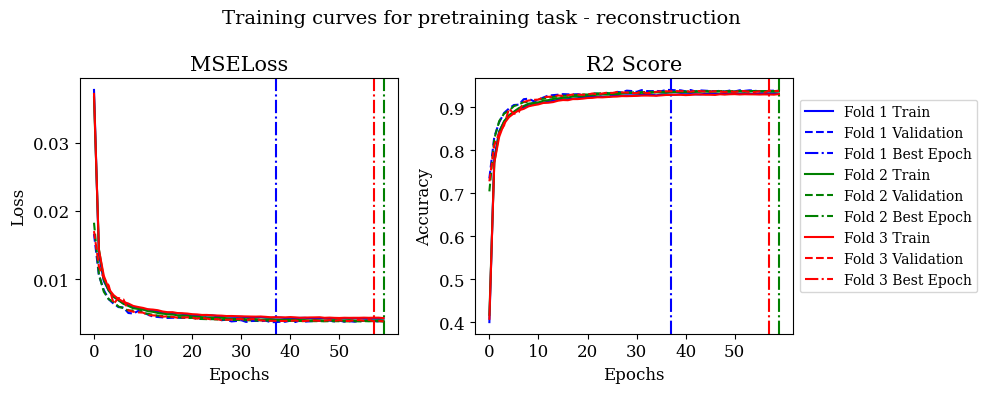

45489_20240607_single_recon_ft done


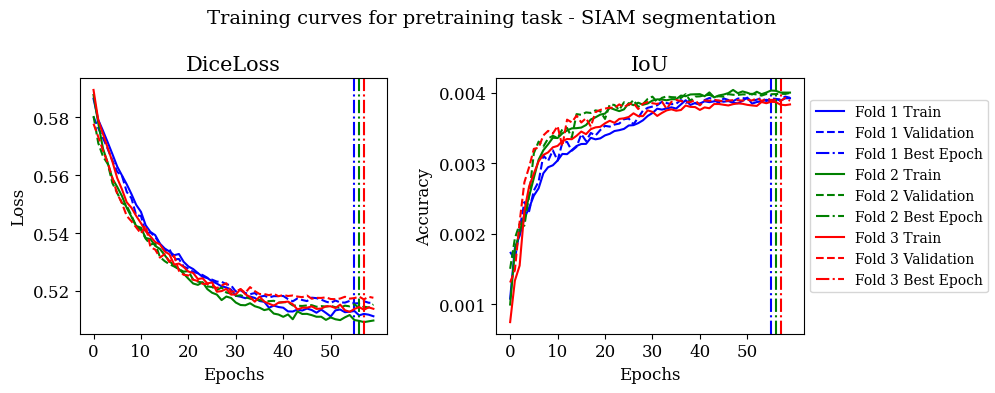

45000_20240527_single_segsiam_ft done


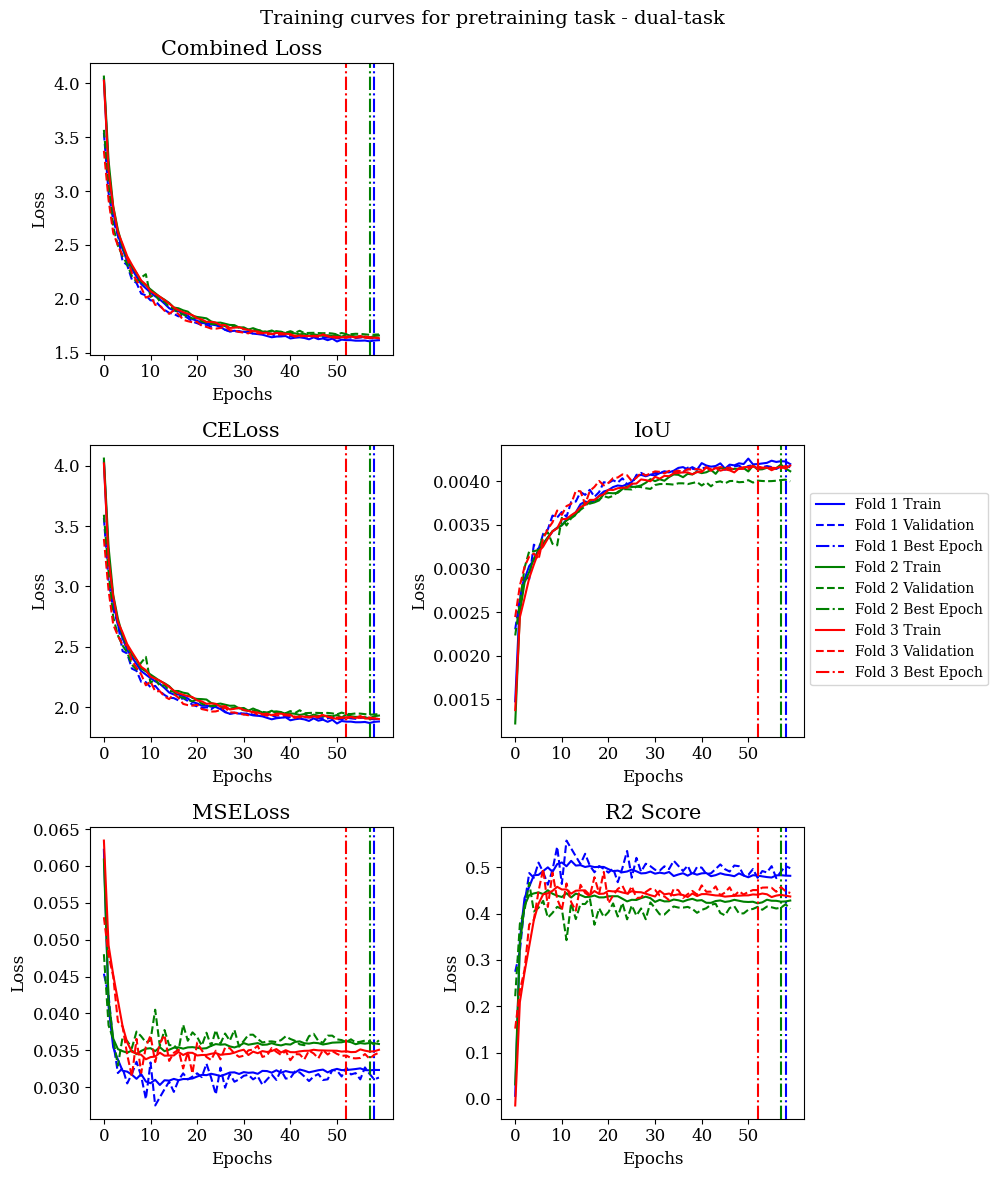

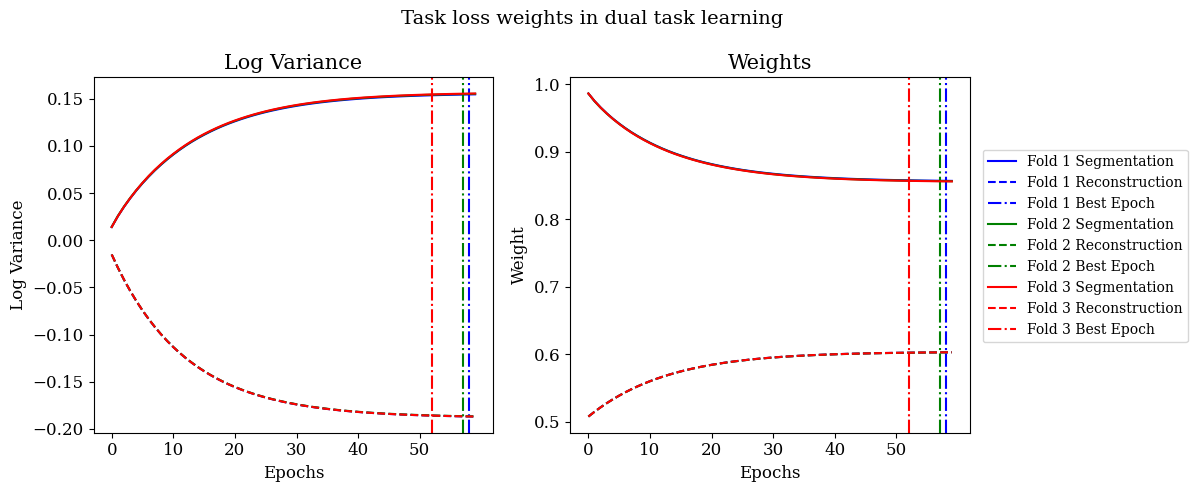

45452_20240606_dual_ft done


In [104]:
for k,i in enumerate(modelbasenames_ssl):
    path = os.path.join(r'E:\Thesis\outputs\01_finalised_models', i)
    # load best epoch from ckpt
    best_epoch_nums = []
    fold_histories = {}
    for j in range(3):
        ckpt = torch.load(os.path.join(path, 'model_outputs', f'fold_{j}_best_model_ssl.pth'), map_location='cpu')
        best_epoch_nums.append(ckpt['epoch'])
        fold_histories[f'fold_{j}'] = np.load(os.path.join(path, 'quickview' , 'fold_histories_ssl',f'fold_{j}_history.npy'), allow_pickle=True).item()

    save_training_curves_ssl(best_epoch_nums, fold_histories,plotnames=plotnames_ssl[k], modelbasename=modelbasenames_ssl[k], metricnames=metric_titles[k], out_path=path)
    print(f'{i} done')
    
    